# Machine Learning with Python on the Enron Dataset

# The objective of this project 

To create a machine learning model that could separate out the POIs.
I choose not to use the text contained within the emails as input for my classifier, 
but rather the metadata about the emails and the financial information. 
The ultimate objective of investigating the Enron dataset is to be able to predict
cases of fraud or unsafe business practices far in advance,
so those responsible can be punished, and those who are innocent are not harmed.

# BACKGROUND

Enron email + financial dataset is a trove of information regarding the Enron Corporation, 
company that infamously went bankrupt in December 2001 as a result of fraudulent business practices.

The email + financial data contains the emails themselves,
metadata about the emails such as number received by and sent from each individual, and financial
information including salary and stock options.

A valuable training and testing ground for machine learning practicioners to try and develop models
that can identify the persons of interests (POIs) from the features within the data. 
The persons of interest are the individuals who were eventually tried for fraud or criminal 
activity in the Enron investigation

**This section sets up import statements for all the packages that will be used throughout this python notebook**

In [1]:
import pickle

# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
from feature_format import *
%matplotlib inline

In [2]:
## Forcing pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 20

# Loading the data

In [3]:
data_dict = pd.read_pickle("final_project_dataset.pkl")

In [4]:
## What is the data type and length?
print('Dataset type: ',type(data_dict))
print('Dataset length: ',len(data_dict))

Dataset type:  <class 'dict'>
Dataset length:  146


In [5]:
## Exploring the dataset through pandas.Dataframe
dataset = pd.DataFrame.from_dict(data_dict, orient='index')
dataset.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,13868,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,3486,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,56301,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,129142,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


# Analyzing string data:

In [6]:
dataset.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,95,58,102,65,93,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,51,60,44,60,53,60,128,80,60,36,129


In [7]:
## Checking the feature data type:
features_to_check = []
for col in dataset.columns:
    datatype = type(dataset[col][0])
    ## Uncomment the line below for a verbose mode:
    # print '{} has type {}'.format(col,datatype)
    ## Here we select those attributes which have string type data:
    if datatype is str:
        features_to_check.append(col)

In [8]:
## Printing out the features that must be checked (string types are not iterable!)
features_to_check

['loan_advances', 'email_address', 'director_fees']

In [9]:
#This attribute type is originally (str type).
#However, it was expected to have financial values
dataset['loan_advances'].unique()

array(['NaN', 2000000, 81525000, 400000, 83925000], dtype=object)

In [10]:
dataset[dataset['loan_advances']!='NaN']

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
FREVERT MARK A,1060932,3275,6426990,17252530,2000000,2000000,mark.frevert@enron.com,NaN,-3367011,14622185,86987,242,10433518,21,7427621,6,False,1617011,2979,4188667,NaN
LAY KENNETH L,1072321,4273,202911,103559793,81525000,7000000,kenneth.lay@enron.com,NaN,-300000,49110078,99832,123,34348384,36,10359729,16,True,3600000,2411,14761694,NaN
PICKERING MARK R,655037,898,NaN,1386690,400000,300000,mark.pickering@enron.com,NaN,NaN,28798,31653,7,28798,67,NaN,0,False,NaN,728,NaN,NaN
TOTAL,26704229,NaN,32083396,309886585,83925000,97343619,NaN,-7576788,-27992891,434509511,5235198,NaN,311764000,NaN,42667589,NaN,False,48521928,NaN,130322299,1398517


In [11]:
#this attribute type is originally (str type). However, 
#it was expected to have financial values too.
dataset['director_fees'].unique()

array(['NaN', 3285, 137864, 113784, 98784, 102492, 119292, 108750, 112492,
       103750, 38346, 101250, 17500, 125034, 1398517, 36666, 109298,
       108579], dtype=object)

only 17 instances contains valid value.
What calls attention in this case is that 
most of the other features has NaN values, 
which brings suspection that maybe they refers 
to false names. 

In [12]:
dataset[dataset['director_fees']!='NaN']

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BELFER ROBERT,NaN,NaN,-102500,102500,NaN,NaN,NaN,44093,NaN,-44093,NaN,NaN,3285,NaN,NaN,NaN,False,NaN,NaN,NaN,3285
BHATNAGAR SANJAY,NaN,523,NaN,15456290,NaN,NaN,sanjay.bhatnagar@enron.com,15456290,NaN,NaN,NaN,0,2604490,29,137864,1,False,NaN,463,-2604490,137864
BLAKE JR. NORMAN P,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,-113784,NaN,1279,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,113784
CHAN RONNIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32460,-98784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,32460,98784
DUNCAN JOHN H,NaN,NaN,NaN,77492,NaN,NaN,NaN,NaN,-25000,371750,NaN,NaN,371750,NaN,NaN,NaN,False,NaN,NaN,NaN,102492
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292
JAEDICKE ROBERT,NaN,NaN,NaN,83750,NaN,NaN,NaN,-44093,-25000,431750,NaN,NaN,431750,NaN,NaN,NaN,False,NaN,NaN,44093,108750
LEMAISTRE CHARLES,NaN,NaN,NaN,87492,NaN,NaN,NaN,NaN,-25000,412878,NaN,NaN,412878,NaN,NaN,NaN,False,NaN,NaN,NaN,112492
MENDELSOHN JOHN,NaN,NaN,NaN,148,NaN,NaN,NaN,NaN,-103750,NaN,148,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,103750
MEYER JEROME J,NaN,NaN,NaN,2151,NaN,NaN,NaN,NaN,-38346,NaN,2151,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,38346


# Converting string "NaN" to numpy.NaN

In [13]:
#some 'NaN' in string type instead of numerical or numpy type, 
#causes some troubles when plotting data or using some classifier. 
#Due to this, the next step is to scan the dataset for 'NaN' string 
#and replace it by numpy.NaN.

for column in dataset.columns:
    dataset[column] = dataset[column].apply(lambda x: np.NaN if x == 'NaN' else x)

In [14]:
## Checking the dataset information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
loan_advances                4 non-null float64
bonus                        82 non-null float64
email_address                111 non-null object
restricted_stock_deferred    18 non-null float64
deferred_income              49 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
from_poi_to_this_person      86 non-null float64
exercised_stock_options      102 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
long_term_incentive          66 non-null float6

# Counting valid data

In [15]:
#In order to select the most appropriate features 
#to explore, we will look for those that are present 
#at least in 70% of the dataset. There are 21 features
#(from which 70% is 15 features), we will first observe
#which instances have more than 15 not null values and
#choose the most complete features from this selection.

notNullDataset = dataset.dropna(thresh=15)

#thresh : int, optional
#Require that many non-NA values.

In [16]:
notNullDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, ALLEN PHILLIP K to WHALLEY LAWRENCE G
Data columns (total 21 columns):
salary                       58 non-null float64
to_messages                  57 non-null float64
deferral_payments            16 non-null float64
total_payments               58 non-null float64
loan_advances                3 non-null float64
bonus                        54 non-null float64
email_address                57 non-null object
restricted_stock_deferred    7 non-null float64
deferred_income              26 non-null float64
total_stock_value            57 non-null float64
expenses                     52 non-null float64
from_poi_to_this_person      57 non-null float64
exercised_stock_options      51 non-null float64
from_messages                57 non-null float64
other                        58 non-null float64
from_this_person_to_poi      57 non-null float64
poi                          58 non-null bool
long_term_incentive          46 non-null floa

In [17]:
#From the output above, the features named deferral_payments; 
#restricted_stock_deferred; and director_fees are removed. 
#Doing so the pre-selected features list can be defined accordingly 
#to its context:

## Only numerical features are being considered here
financialFeatures = ['salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
                     'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive']

behavioralFeatures = ['to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']

allFeatures = ['poi','salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
               'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive',
               'to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']

In [18]:
#in the feature_format() method the "NaN" strings are 
#replaced by zeros, we need to make this adjustment here.

dataset.fillna(0,inplace=True)

# Visualizing data by features

In [19]:
#to visualize how the data is distributed accordingly 
#to each feature, as well as identifying outliers 
#through visual inspection.

In [20]:
#The function is useful to get information for only one variable.

def visualizeFeat(series, figsize):
    ''' series = pandas.series, which can be inputed as "dataframe['feature']
        figsize = (width,length)'''
    fig, axes = plt.subplots(2,1,figsize=figsize, sharex=True)
    series.plot(kind='kde', ax=axes[0])
    sns.boxplot(x=series, ax=axes[1])
    plt.xlim(series.min(), series.max()*1.1)
    return

In [21]:
#To explore the whole dataset (or at least a good chunk of it), 
#we will code a function to show them all:

def visualize3Feats(dataset, features):
    '''Shows the distribution and the boxplot for the given features of a pandas.Dataframe:
        dataset = pandas dataframe.
        features = list of features of interest'''
    ## Building the Figure:
    fig, axes = plt.subplots(2,3,figsize=(20,20), sharex=False)
    for col, feat in enumerate(features):
        dataset[feat].plot(kind='kde', ax=axes[0,col])
        sns.boxplot(x=dataset[feat], ax=axes[1,col])
        axes[0,col].set_xlim(dataset[feat].min(), dataset[feat].max()*1.1);
        axes[1,col].set_xlim(dataset[feat].min(), dataset[feat].max()*1.1);
    return

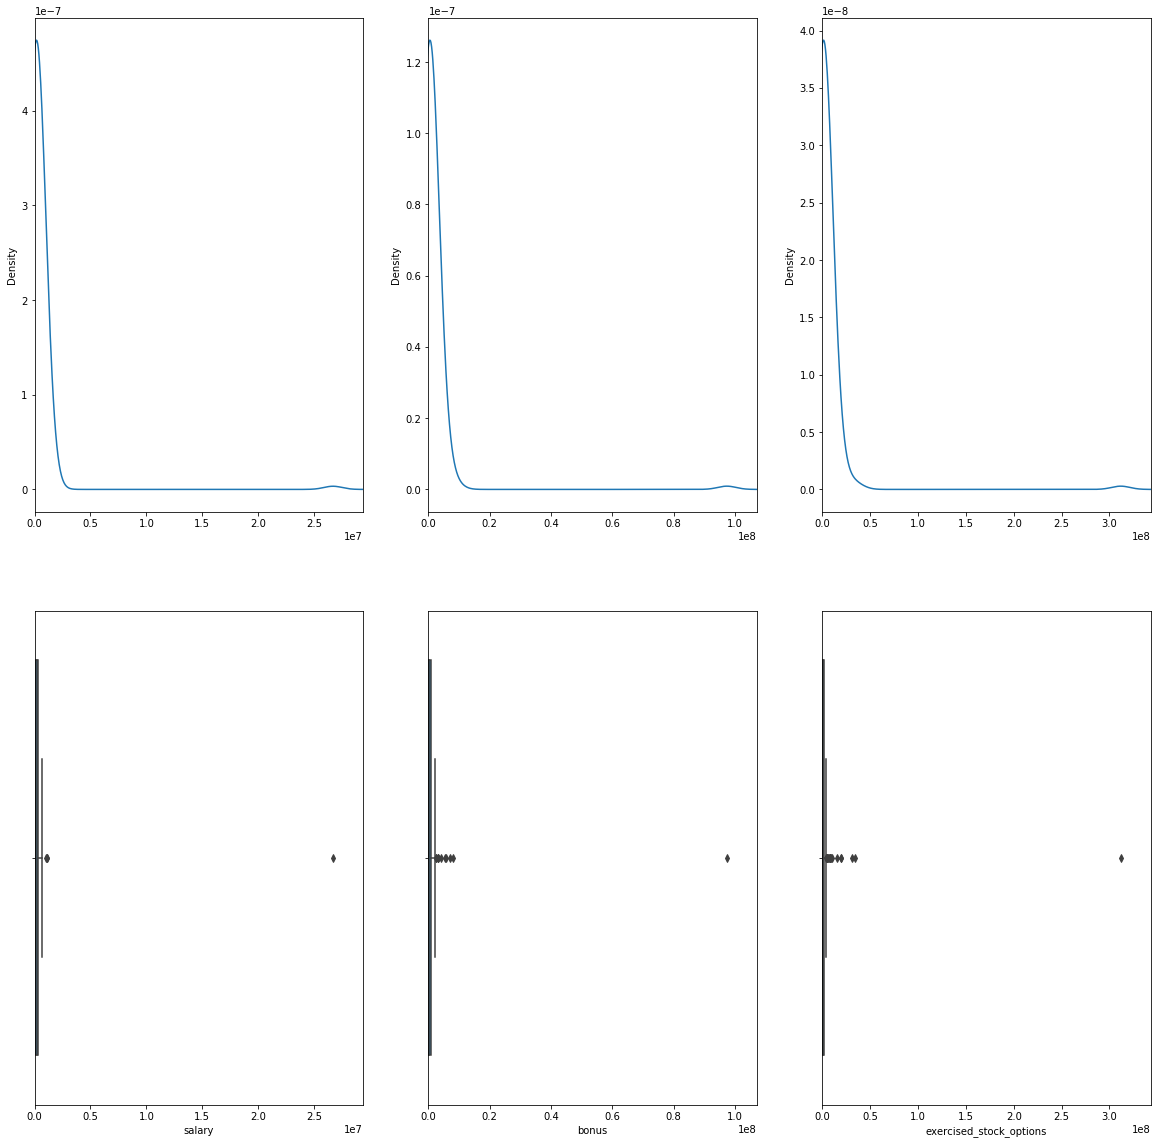

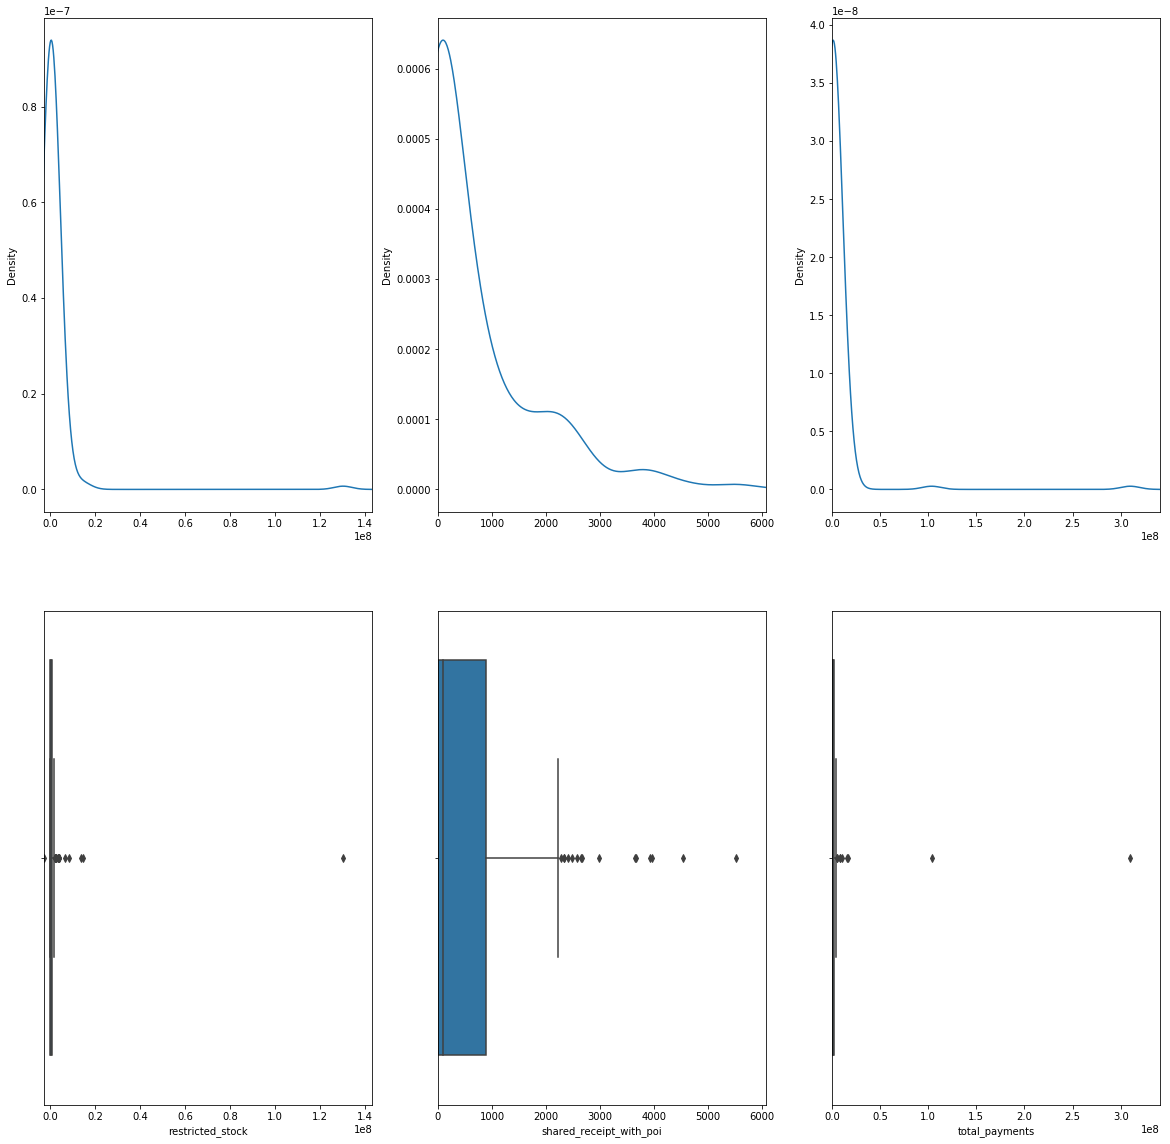

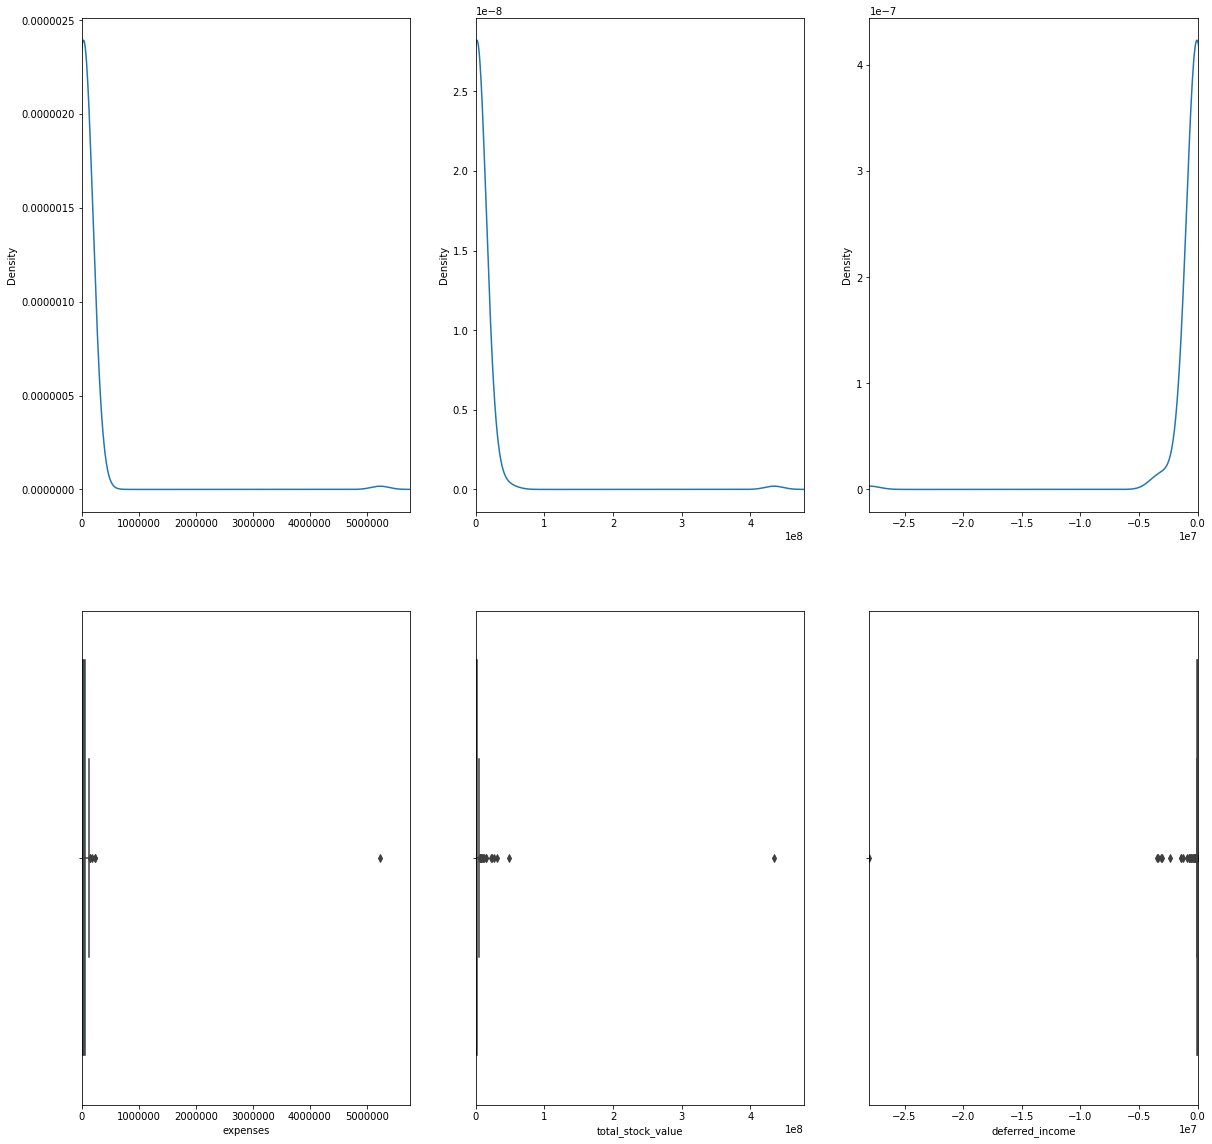

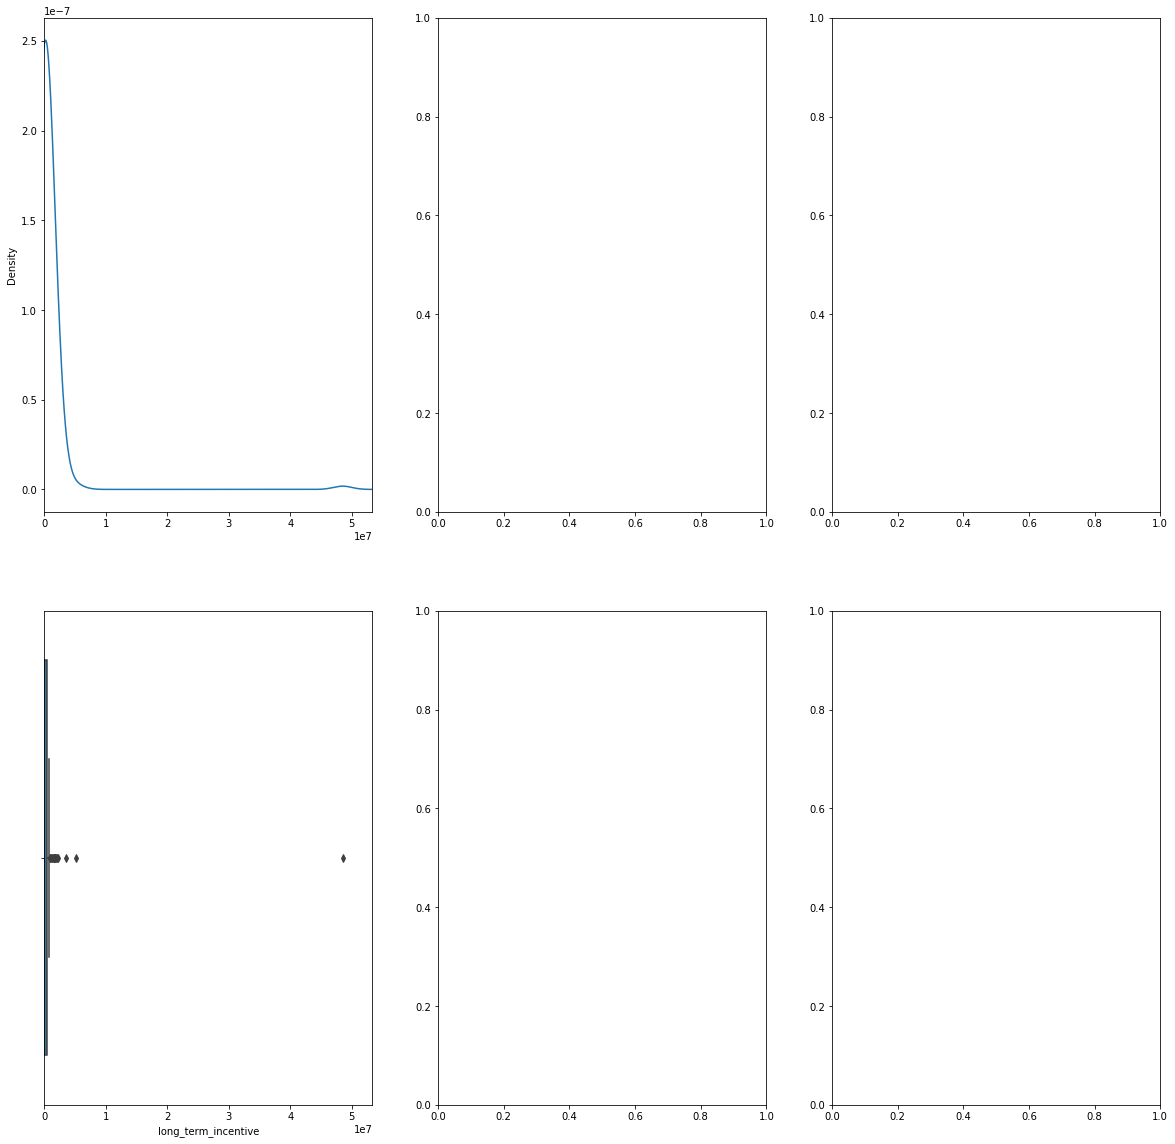

In [22]:
### Visualizing financial features:
numPlots = int(np.ceil(len(financialFeatures)/3.))
for i in range(numPlots):
    shift = i*3
    visualize3Feats(dataset,financialFeatures[0+shift:3+shift])

# Removing TOTAL instance

In [23]:
#the "TOTAL" instance must be removed, 
#since we are interested only on POIs.
dataset.drop('TOTAL',inplace=True)  
#Removing the anomalous instance

# Checking the class distribution

In [24]:
## Counting the POI and Non POI instances
dataset['poi'].value_counts()

False    127
True      18
Name: poi, dtype: int64

# Stratified data split

In [25]:
#our data is unbalanced and so it is important to split 
#data in a stratified way, i.e., each subset must have 
#the same proportion of each class.

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

In [26]:
## For pandas.Dataframe the train_test_split is given in a straight way:
trainData, testData = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset['poi'])

#stratify : array-like or None (default=None)
#If not None, data is split in a stratified fashion, 
#using this as the class labels.

In [27]:
## Converting boolean data into int:
dataset['poi'] = dataset['poi'].apply(lambda x: int(x))

trainData['poi'] = trainData['poi'].apply(lambda x: int(x))

testData['poi'] = testData['poi'].apply(lambda x: int(x))

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


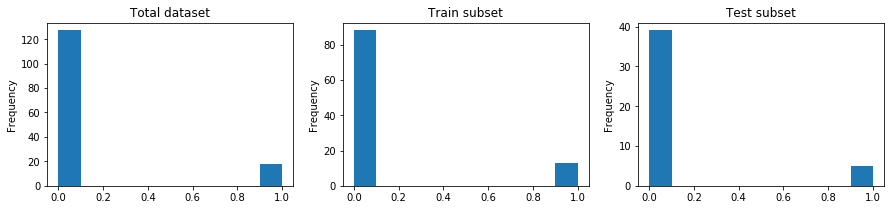

In [28]:
## Evaluating the class distribution:
fig2, axes2 = plt.subplots(1,3,figsize=(15,3), sharex=False);

dataset['poi'].plot(kind='hist', ax=axes2[0], title='Total dataset');

trainData['poi'].plot(kind='hist', ax=axes2[1], title='Train subset');

testData['poi'].plot(kind='hist', ax=axes2[2], title='Test subset');

# Feature extraction

## Verifying correlation among features

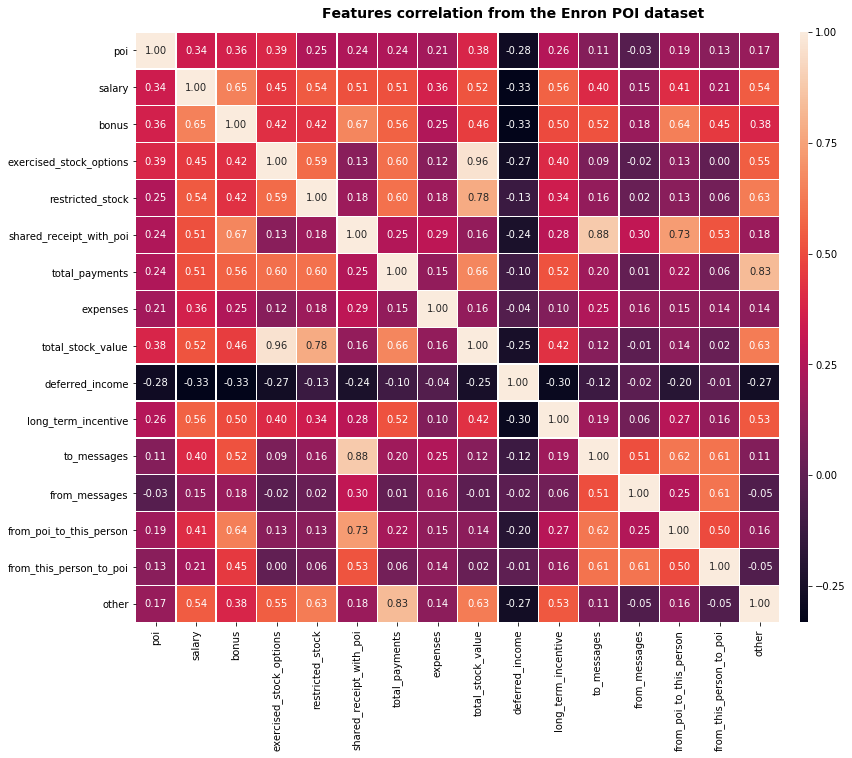

In [29]:
## Calculating the correlation among features by Pearson method
correlationDataframe = dataset[allFeatures].corr()

# Drawing a heatmap with the numeric values in each cell
fig1, ax = plt.subplots(figsize=(14,10))
fig1.subplots_adjust(top=.945)
plt.suptitle('Features correlation from the Enron POI dataset', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"vertical", 'pad':0.025, 'aspect':70}
sns.heatmap(correlationDataframe, annot=True, fmt='.2f', linewidths=.3, ax=ax, cbar_kws=cbar_kws);

# Applying PCA on correlated features to generate a new one

In [30]:
# the financial features are highly correlated, 
#we will apply PCA to generate an only one new 
#feature from them.

from sklearn.decomposition import PCA

In [31]:
## Listing the financial features
financialFeatures

['salary',
 'bonus',
 'exercised_stock_options',
 'restricted_stock',
 'shared_receipt_with_poi',
 'total_payments',
 'expenses',
 'total_stock_value',
 'deferred_income',
 'long_term_incentive']

In [32]:
## Defining only one resulting component:
pca = PCA(n_components=1)
pca.fit(dataset[financialFeatures])

#class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)

#n_components : int, float, None or string
#Number of components to keep. 
#if n_components is not set all components are kept

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pcaComponents = pca.fit_transform(dataset[financialFeatures])

In [34]:
dataset['financial'] = pcaComponents

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


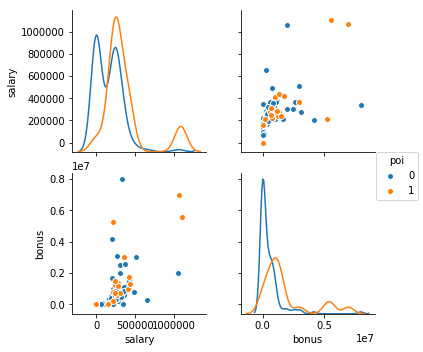

In [35]:
sns.pairplot(dataset,hue='poi',vars=['salary','bonus'], diag_kind='kde');

#Plot pairwise relationships in a dataset.

#hue : string (variable name), optional
#Variable in data to map plot aspects to different colors.

#vars : list of variable names, optional
#Variables within data to use, otherwise use every column with a numeric datatype.

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


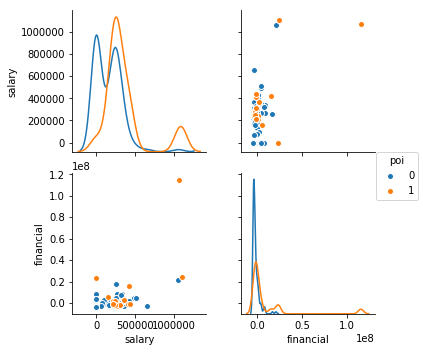

In [36]:
sns.pairplot(dataset,hue='poi',vars=['salary','financial'], diag_kind='kde');

# Univariate feature selection

In [37]:
## Adding up the new 'financial' feature to the 'allFeatures' list:
allFeatures.append('financial')
financialFeatures.append('financial')

In [38]:
allFeatures

['poi',
 'salary',
 'bonus',
 'exercised_stock_options',
 'restricted_stock',
 'shared_receipt_with_poi',
 'total_payments',
 'expenses',
 'total_stock_value',
 'deferred_income',
 'long_term_incentive',
 'to_messages',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'financial']

In [39]:
#an univariate feature selection is applied.

from sklearn.feature_selection import SelectPercentile, f_classif

selectorDataset = dataset[financialFeatures]
selectorLabel = dataset['poi']

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 5% most significant features
selector = SelectPercentile(f_classif, percentile=5)
#sklearn.feature_selection.SelectPercentile(score_func=<function f_classif>, percentile=10)[source]
#Select features according to a percentile of the highest scores.

#percentile : int, optional, default=10
#Percent of features to keep.

selector.fit(selectorDataset, selectorLabel)
#Run score function on (X, y) and get the appropriate features.

SelectPercentile(percentile=5,
         score_func=<function f_classif at 0x000001F5AD97FA60>)

<BarContainer object of 11 artists>

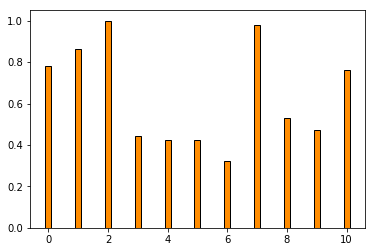

In [40]:
## Plotting the features selection: 
X_indices = np.arange(selectorDataset.shape[-1])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [41]:
len(scores)

11

In [42]:
## Printing out the selected financial features: 
selectedFeatures = ['poi']  #'poi' must be the first one due to the evaluation methods defined by Udacity.
for ix, pval in enumerate(scores):
    print(financialFeatures[ix],': ',pval)
    if (pval >= 0.45):
        selectedFeatures.append(financialFeatures[ix])

salary :  0.7818686344960931
bonus :  0.8657013901313363
exercised_stock_options :  1.0
restricted_stock :  0.4447590111988349
shared_receipt_with_poi :  0.4228079784855426
total_payments :  0.42525219924626906
expenses :  0.32408364888457886
total_stock_value :  0.9794654890133486
deferred_income :  0.5288269433859027
long_term_incentive :  0.472735821399702
financial :  0.759729734365803


In [43]:
selectedFeatures

['poi',
 'salary',
 'bonus',
 'exercised_stock_options',
 'total_stock_value',
 'deferred_income',
 'long_term_incentive',
 'financial']

# Alternative feature selection


Since the PCA applied to the financial features creates a 
new variable ('financial') which contains the most important
components of the others, one alternative is to append it to 
the behavioral features selected before, in what we call 
strategicFeatures. 

Now we will evaluate the performance of applying machine 
learning in this two classes of features.


In [44]:
strategicFeatures = ['poi'] + behavioralFeatures + ['financial']

In [45]:
strategicFeatures

['poi',
 'to_messages',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'financial']

# Feature scaling

Besides some of the machine learning algorithms chosen 
for this analysis (Naive Bayes and Adaboost) are 
invariant to feature scaling

we are also interested in using SVM it is important 
to apply feature scaling in our dataset. Furthermore, 
the "strategicFeatures" mixes two types of data, 
the financial data from PCA and the behavioral 
data from the number of emails sent.

In [46]:
from sklearn.preprocessing import MinMaxScaler
#Transforms features by scaling each feature to a given range.

scaler = MinMaxScaler()
scaler.fit(dataset[allFeatures])
#Compute the minimum and maximum to be used for later scaling.

dataset[allFeatures] = scaler.transform(dataset[allFeatures])
#Fit to data, then transform it.

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Machine Learning

We select some classification algorithms to apply
on the features we extracted from our dataset. 
After applying each of the selected machine 
learning algorithms -- naive Bayes; Adaboost 
with decision trees; and SVM -- it is important 
to evaluate its classification results. 

Considering we have an unbalanced dataset, i.e. 
the number of samples for each class are distinct,
we cannot use accuracy for measuring its performance. 
In this case we choose precision and recall for 
performance measurements.

In [47]:
## Converting back the pandas Dataframe to the 
#dictionary structure, in order to use the Udacity evaluating code.

my_dataset = dataset.to_dict(orient='index')
features_list = selectedFeatures

#features_list = strategicFeatures

### Extract features and labels from dataset 
#for local testing

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [48]:
## Splitting the data:
# Example starting point. 
#Try investigating other evaluation techniques!

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [49]:
## Defining an evaluation metric based on 
#(http://scikit-learn.org/stable/modules/model_evaluation.html)

from sklearn.metrics import classification_report
def evaluateClassif(clf):
    classes=['Non-POI','POI']  ## Defining the classes labels
    predTrain = clf.predict(features_train)
    print('################### Training data ##################')
    print(classification_report(labels_train, predTrain, target_names=classes))
    
    predTest = clf.predict(features_test)
    print('################### Testing data ###################')
    print(classification_report(labels_test, predTest, target_names=classes))
    
    return

In [50]:
## Importing GridSearch algorithm for parameter selection:
from sklearn.model_selection import GridSearchCV

# Naive Bayes classifier

In [51]:
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. 
#For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_parameters = {}

In [52]:
clf_nb = GridSearchCV(nb, nb_parameters)
clf_nb.fit(features_train, labels_train)

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
evaluateClassif(clf_nb)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       0.90      0.93      0.92        87
         POI       0.45      0.36      0.40        14

   micro avg       0.85      0.85      0.85       101
   macro avg       0.68      0.64      0.66       101
weighted avg       0.84      0.85      0.84       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.93      0.95      0.94        40
         POI       0.33      0.25      0.29         4

   micro avg       0.89      0.89      0.89        44
   macro avg       0.63      0.60      0.61        44
weighted avg       0.87      0.89      0.88        44



# AdaBoost classifier

In [54]:
### Adaboost Classifier
### http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
## Defining the Adaboost parameters for GridSearch:
abc_parameters = {"learning_rate" : [0.5, 1., 2., 5., 10., 100.],
                 "n_estimators": [10,50,100,200,500,900,2000],
                 "algorithm": ['SAMME','SAMME.R']}

dtc_parameters = ["criterion='entropy', max_depth =2, min_samples_split=2, min_samples_leaf=6", 
                      "n_estimators=150, min_samples_split=5", 
                      "n_estimators=150",
                      "Default"]
dtc = DecisionTreeClassifier(random_state = 42, max_features = "auto", max_depth = None)
abc = AdaBoostClassifier(base_estimator=dtc)

# run grid search
#clf_decisiontree = GridSearchCV(dtc, param_grid = dtc_parameters)

clf_adaboost = GridSearchCV(abc, param_grid=abc_parameters)

In [56]:
clf_adaboost.fit(features_train, labels_train)

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.5, 1.0, 2.0, 5.0, 10.0, 100.0], 'n_estimators': [10, 50, 100, 200, 500, 900, 2000], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
evaluateClassif(clf_adaboost)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       1.00      1.00      1.00        87
         POI       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.90      0.95      0.93        40
         POI       0.00      0.00      0.00         4

   micro avg       0.86      0.86      0.86        44
   macro avg       0.45      0.47      0.46        44
weighted avg       0.82      0.86      0.84        44



# SVM classifier

In [58]:
from sklearn import svm
svm_parameters = {'kernel':['linear','rbf','poly','sigmoid'], 
                  'C':[0.5,1.,5.,10.,50.,100.,1000.], 'gamma':['scale']}
svr = svm.SVC()

In [59]:
clf_svc = GridSearchCV(svr, svm_parameters);

In [60]:
clf_svc.fit(features_train, labels_train)

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 1000.0], 'gamma': ['scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
evaluateClassif(clf_svc)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       0.89      1.00      0.94        87
         POI       1.00      0.21      0.35        14

   micro avg       0.89      0.89      0.89       101
   macro avg       0.94      0.61      0.65       101
weighted avg       0.90      0.89      0.86       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.91      1.00      0.95        40
         POI       0.00      0.00      0.00         4

   micro avg       0.91      0.91      0.91        44
   macro avg       0.45      0.50      0.48        44
weighted avg       0.83      0.91      0.87        44



C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusions

Evaluating the output of the classifiers above, 
it's effort to choose Naive Bayes Classifier, 
since it had the best considered metrics 
(precision and recall) for POI in the testing 
data. It must be considered, though, that we 
could use more strategies to iterate the test 
and to certify this would be the best machine 
learning algorithm to be used.
